# Time Series Analysis of NAICS

<img src="img.svg.png">

The North American Industry Classification System or NAICS is a classification of business establishments by type of economic activity. 
It is used by government and business in Canada, Mexico, and the United States of America.

It has largely replaced the older Standard Industrial Classification (SIC) system, except in some government agencies, such as the U.S. Securities and Exchange Commission (SEC).

An establishment is typically a single physical location, though administratively distinct operations at a single location may be treated as distinct establishments. 
Each establishment is classified to an industry according to the primary business activity taking place there. NAICS does not offer guidance on the classification of enterprises (companies) which are composed of multiple establishments.

NAICS is designed to provide common definitions of the
industrial structure of the three countries and a common statistical framework to facilitate the
analysis of the three economies.

## The data provided contains:

<b>a- Raw data:</b><br>
15 CSV files beginning with RTRA.<br>
These files contain employment data by industry at different levels of aggregation; 2-digit NAICS, 3-digit NAICS, and 4-digit
NAICS. <br>
<ul>
Columns mean as follows:
    <li>
 SYEAR: Survey Year
        </li>
    <li>
 SMTH: Survey Month
        </li>
    <li>
 NAICS: Industry name and associated NAICS code in the bracket
        </li>
    <li>
 _EMPLOYMENT_: Employment
        </li>
</ul>

<b>b- LMO Detailed Industries by NAICS:</b><br> 
An excel file for mapping the RTRA data to the desired data. <br>
The first column of this file has a list of 59 industries that are frequently used.<br>
The second column has their NAICS definitions. <br>
Using these NAICS definitions and RTRA data, you would create a monthly employment data series from 1997 to 2018 for these 59
industries.


<b>c- Data Output Template:</b><br>
An excel file with an empty column for employment. 

## Task

In this task, we need to understand how the NAICS works as a hierarchical structure for defining industries at different levels of aggregation. <br>

<b>For example:</b> <br>
In NAICS 2017 – Statistics Canada.pdf (see page 22), a 2-digit NAICS industry (e.g., 23 - Construction) is
composed of some 3-digit NAICS industries (236 - Construction of buildings, 237 - Heavy
and civil engineering construction, and a few more 3-digit NAICS industries).<br>

Similarly, a 3-digit NAICS industry (e.g., 236 - Construction of buildings), is composed of
4-digit NAICS industries (2361 - Residential building construction and 2362 -Non-residential building construction).

##  Get, and prepare the Dataset:

### a- Loading and exploring the LMO_Detailed_Industries_by_NAICS data:

In [164]:
# import libraries
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [165]:
# Loading LMO_Detailed_Industries_by_NAICS data
LMO_Detailed_Industries_df = pd.read_excel("Data\LMO_Detailed_Industries_by_NAICS.xlsx")
LMO_Detailed_Industries_df.head()

,LMO_Detailed_Industry,NAICS
0,Farms,111 & 112
1,"Fishing, hunting and trapping",114
2,Forestry and logging,113
3,Support activities for agriculture and forestry,115
4,Oil and gas extraction,211


NAICS column needs some cleaning. we need to replace the & by a comma.

In [166]:
# Create a list of NAICS for industries
LMO_Detailed_Industries_df['NAICS'] = LMO_Detailed_Industries_df['NAICS'].replace({'&':','}, regex=True)

In [167]:
LMO_Detailed_Industries_df.head(10)

,LMO_Detailed_Industry,NAICS
0,Farms,"111 , 112"
1,"Fishing, hunting and trapping",114
2,Forestry and logging,113
3,Support activities for agriculture and forestry,115
4,Oil and gas extraction,211
5,Support activities for mining and oil and gas ...,213
6,Mining,212
7,Utilities,22
8,Construction,23
9,"Food, beverage and tobacco manufacturing","311 , 312"


We are going now to separate the multiple code. 

In [168]:
LMO_Detailed_Industries_df=LMO_Detailed_Industries_df[['NAICS','LMO_Detailed_Industry']]

LMO_Detailed_Industries_df1=LMO_Detailed_Industries_df[~LMO_Detailed_Industries_df['NAICS'].str.contains(',', na=False)]
LMO_Detailed_Industries_df2=LMO_Detailed_Industries_df[LMO_Detailed_Industries_df['NAICS'].str.contains(',', na=False)]


LMO_Detailed_Industries_df2=LMO_Detailed_Industries_df2.assign(NAICS=LMO_Detailed_Industries_df2['NAICS'].str.split(',')).explode('NAICS')


In [169]:
LMO_Detailed_Industries_df=LMO_Detailed_Industries_df1.append(LMO_Detailed_Industries_df2, ignore_index=True)
LMO_Detailed_Industries_df.columns=['CODE','LMO_Detailed_Industry']

In [170]:
LMO_Detailed_Industries_df

,CODE,LMO_Detailed_Industry
0,114,"Fishing, hunting and trapping"
1,113,Forestry and logging
2,115,Support activities for agriculture and forestry
3,211,Oil and gas extraction
4,213,Support activities for mining and oil and gas ...
...,...,...
102,518,"Broadcasting, data processing, and information"
103,519,"Broadcasting, data processing, and information"
104,913,Local and Indigenous public administration
105,914,Local and Indigenous public administration


### b- Loading and exploring the 2-Digit NAICS Industries data:

In [171]:
# All the csv files for the same digit have the same columns.

In [172]:
# Get the data of 2digit NAICS industries
df_2_NAICS = pd.concat(map(pd.read_csv, ['Data/RTRA_Employ_2NAICS_00_05.csv', 'Data/RTRA_Employ_2NAICS_06_10.csv',
                                         'Data/RTRA_Employ_2NAICS_11_15.csv', 'Data/RTRA_Employ_2NAICS_16_20.csv',
                                         'Data/RTRA_Employ_2NAICS_97_99.csv']))

In [173]:
df_2_NAICS.head()

,SYEAR,SMTH,NAICS,_EMPLOYMENT_
0,2000,1,Accommodation and food services [72],148000
1,2000,1,"Administrative and support, waste management a...",59250
2,2000,1,"Agriculture, forestry, fishing and hunting [11]",61750
3,2000,1,"Arts, entertainment and recreation [71]",39500
4,2000,1,Construction [23],106250


In [174]:
df_2_NAICS.tail()

,SYEAR,SMTH,NAICS,_EMPLOYMENT_
715,1999,12,"Real estate, rental and leasing [53]",37000
716,1999,12,Retail trade [44-45],230750
717,1999,12,Transportation and warehousing [48-49],117500
718,1999,12,Utilities [22],10250
719,1999,12,Wholesale trade [41],74000


In [175]:
df_2_NAICS.shape

(5472, 4)

### Separate the Industry description and NAICS code 

Separate the code from NAICS into a lower and upper code columns.

In [176]:
# Separate the Industry description and NAICS code 
code2 = pd.DataFrame(df_2_NAICS['NAICS'].str.split('[').tolist(), columns=["NAICS","CODE"])
code2 = pd.DataFrame(code2['CODE'].str.replace(']', '').str.split('-').tolist(), columns=["CODE", "Upper_Code"])

In [177]:
code2

,CODE,Upper_Code
0,72,None
1,56,None
2,11,None
3,71,None
4,23,None
...,...,...
5467,53,None
5468,44,45
5469,48,49
5470,22,None


In [178]:
df_2_NAICS["CODE"] = code2["CODE"]
df_2_NAICS["Upper_Code"] = code2["Upper_Code"]

In [179]:
df_2_NAICS

,SYEAR,SMTH,NAICS,_EMPLOYMENT_,CODE,Upper_Code
0,2000,1,Accommodation and food services [72],148000,72,None
1,2000,1,"Administrative and support, waste management a...",59250,56,None
2,2000,1,"Agriculture, forestry, fishing and hunting [11]",61750,11,None
3,2000,1,"Arts, entertainment and recreation [71]",39500,71,None
4,2000,1,Construction [23],106250,23,None
...,...,...,...,...,...,...
715,1999,12,"Real estate, rental and leasing [53]",37000,53,None
716,1999,12,Retail trade [44-45],230750,44,45
717,1999,12,Transportation and warehousing [48-49],117500,48,49
718,1999,12,Utilities [22],10250,22,None


### c- Loading and exploring the 3-Digit NAICS Industries data:

In [180]:
# Get the data of 3digit NAICS industries
df_3_NAICS = pd.concat(map(pd.read_csv, ['Data/RTRA_Employ_3NAICS_00_05.csv','Data/RTRA_Employ_3NAICS_06_10.csv', 
                                         'Data/RTRA_Employ_3NAICS_11_15.csv','Data/RTRA_Employ_3NAICS_16_20.csv',
                                         'Data/RTRA_Employ_3NAICS_97_99.csv']))

In [181]:
df_3_NAICS

,SYEAR,SMTH,NAICS,_EMPLOYMENT_
0,2000,1,Aboriginal public administration[914],500
1,2000,1,Accommodation services[721],33750
2,2000,1,Administrative and support services[561],55250
3,2000,1,Air transportation[481],17500
4,2000,1,Ambulatory health care services[621],53000
...,...,...,...,...
3703,1999,12,Utilities[221],10000
3704,1999,12,Warehousing and storage[493],4500
3705,1999,12,Waste management and remediation services[562],4500
3706,1999,12,Water transportation[483],6750


### Separate the Industry description and NAICS code 

Separate the code from NAICS into a lower and upper code columns.

In [182]:
# Separate the Industry description and NAICS code 
code3 = pd.DataFrame(df_3_NAICS['NAICS'].str.split('[').tolist(), columns=["NAICS","CODE"])
code3 = pd.DataFrame(code3['CODE'].str.replace(']', ''))

In [183]:
df_3_NAICS["CODE"] = code3["CODE"]
df_3_NAICS["Upper_Code"] = 0

In [184]:
df_3_NAICS

,SYEAR,SMTH,NAICS,_EMPLOYMENT_,CODE,Upper_Code
0,2000,1,Aboriginal public administration[914],500,914,0
1,2000,1,Accommodation services[721],33750,721,0
2,2000,1,Administrative and support services[561],55250,561,0
3,2000,1,Air transportation[481],17500,481,0
4,2000,1,Ambulatory health care services[621],53000,621,0
...,...,...,...,...,...,...
3703,1999,12,Utilities[221],10000,413,0
3704,1999,12,Warehousing and storage[493],4500,113,0
3705,1999,12,Waste management and remediation services[562],4500,526,0
3706,1999,12,Water transportation[483],6750,442,0


### d- Loading and exploring the 4-Digit NAICS Industries data:

In [185]:
# Get the data of 3digit NAICS industries
df_4_NAICS = pd.concat(map(pd.read_csv, ['Data/RTRA_Employ_4NAICS_00_05.csv','Data/RTRA_Employ_4NAICS_06_10.csv', 
                                         'Data/RTRA_Employ_4NAICS_11_15.csv','Data/RTRA_Employ_4NAICS_16_20.csv',
                                         'Data/RTRA_Employ_4NAICS_97_99.csv']))

In [186]:
df_4_NAICS.head()

,SYEAR,SMTH,NAICS,_EMPLOYMENT_
0,2000,1,1100,500
1,2000,1,1111,0
2,2000,1,1112,2000
3,2000,1,1113,250
4,2000,1,1114,7750


### Separate the Industry description and NAICS code 


Separate the code from NAICS into a lower and upper code columns.

In [187]:
# Separate the Industry description and NAICS code 
df_4_NAICS['CODE'] = df_4_NAICS['NAICS'] 
df_4_NAICS["Upper_Code"] = None

In [188]:
df_4_NAICS.head()

,SYEAR,SMTH,NAICS,_EMPLOYMENT_,CODE,Upper_Code
0,2000,1,1100,500,1100,None
1,2000,1,1111,0,1111,None
2,2000,1,1112,2000,1112,None
3,2000,1,1113,250,1113,None
4,2000,1,1114,7750,1114,None


In [189]:
df_4_NAICS.shape

(85572, 6)

In [190]:
df_4_NAICS.tail()

,SYEAR,SMTH,NAICS,_EMPLOYMENT_,CODE,Upper_Code
11119,1999,12,9111,2250,9111,None
11120,1999,12,9120,28500,9120,None
11121,1999,12,9130,30250,9130,None
11122,1999,12,9141,500,9141,None
11123,1999,12,9191,750,9191,None


In [191]:
df_4_NAICS.isna().sum()

SYEAR               0
SMTH                0
NAICS               0
_EMPLOYMENT_        0
CODE                0
Upper_Code      85572
dtype: int64

4 digits NAICS dosenot have Upper_Code.

## Combine all the 2, 3 and 4 digits NAICS

In [192]:
combined_df = (df_2_NAICS.append(df_3_NAICS)).append(df_4_NAICS) 

In [193]:
combined_df

,SYEAR,SMTH,NAICS,_EMPLOYMENT_,CODE,Upper_Code
0,2000,1,Accommodation and food services [72],148000,72,None
1,2000,1,"Administrative and support, waste management a...",59250,56,None
2,2000,1,"Agriculture, forestry, fishing and hunting [11]",61750,11,None
3,2000,1,"Arts, entertainment and recreation [71]",39500,71,None
4,2000,1,Construction [23],106250,23,None
...,...,...,...,...,...,...
11119,1999,12,9111,2250,9111,None
11120,1999,12,9120,28500,9120,None
11121,1999,12,9130,30250,9130,None
11122,1999,12,9141,500,9141,None


### We need to perform our analysis from 1997 to 2018 so we need to drop 2019 rows.

In [194]:
#filtering our df
combined_df= combined_df[~((combined_df.SYEAR).astype('str')>'2019')]
combined_df

,SYEAR,SMTH,NAICS,_EMPLOYMENT_,CODE,Upper_Code
0,2000,1,Accommodation and food services [72],148000,72,None
1,2000,1,"Administrative and support, waste management a...",59250,56,None
2,2000,1,"Agriculture, forestry, fishing and hunting [11]",61750,11,None
3,2000,1,"Arts, entertainment and recreation [71]",39500,71,None
4,2000,1,Construction [23],106250,23,None
...,...,...,...,...,...,...
11119,1999,12,9111,2250,9111,None
11120,1999,12,9120,28500,9120,None
11121,1999,12,9130,30250,9130,None
11122,1999,12,9141,500,9141,None


## Joining codes to the output template, To get the data_output formated result


In [195]:
#Read 'Data_Output_Template' file

output_df = pd.read_excel('Data\Data_Output_Template.xlsx')

In [196]:
#join tables
output_df= output_df.merge(LMO_Detailed_Industries_df,how='left', on='LMO_Detailed_Industry')

In [197]:
output_df.head()

,SYEAR,SMTH,LMO_Detailed_Industry,Employment,CODE
0,1997,1,Accommodation services,NaN,721
1,1997,1,Air transportation,NaN,481
2,1997,1,Ambulatory health care services,NaN,621
3,1997,1,"Amusement, gambling and recreation industries",NaN,713
4,1997,1,"Architectural, engineering and related services",NaN,5413


In [198]:
#Add data to the output template
cols = ['SYEAR', 'SMTH', 'CODE']
output_df['check']= output_df[cols].apply(lambda row: '_'.join(row.values.astype(str)), axis=1)

In [199]:
output_df.head()

,SYEAR,SMTH,LMO_Detailed_Industry,Employment,CODE,check
0,1997,1,Accommodation services,NaN,721,1997_1_721
1,1997,1,Air transportation,NaN,481,1997_1_481
2,1997,1,Ambulatory health care services,NaN,621,1997_1_621
3,1997,1,"Amusement, gambling and recreation industries",NaN,713,1997_1_713
4,1997,1,"Architectural, engineering and related services",NaN,5413,1997_1_5413


In [200]:
combined_df['check']= combined_df[cols].apply(lambda row: '_'.join(row.values.astype(str)), axis=1)

combined_df=combined_df[['check', '_EMPLOYMENT_']]

In [201]:
combined_df.head()

,check,_EMPLOYMENT_
0,2000_1_72,148000
1,2000_1_56,59250
2,2000_1_11,61750
3,2000_1_71,39500
4,2000_1_23,106250


In [202]:
output_df=output_df.merge(combined_df,how='left', on='check')


In [203]:
output_df

,SYEAR,SMTH,LMO_Detailed_Industry,Employment,CODE,check,_EMPLOYMENT_
0,1997,1,Accommodation services,NaN,721,1997_1_721,24000.0
1,1997,1,Air transportation,NaN,481,1997_1_481,17000.0
2,1997,1,Ambulatory health care services,NaN,621,1997_1_621,40000.0
3,1997,1,"Amusement, gambling and recreation industries",NaN,713,1997_1_713,20000.0
4,1997,1,"Architectural, engineering and related services",NaN,5413,1997_1_5413,27000.0
...,...,...,...,...,...,...,...
28258,2018,12,Utilities,NaN,22,2018_12_22,106500.0
28259,2018,12,Warehousing and storage,NaN,493,2018_12_493,19250.0
28260,2018,12,Water transportation,NaN,483,2018_12_483,0.0
28261,2018,12,Wholesale trade,NaN,41,2018_12_41,51750.0


In [204]:
output_df.drop(['Employment','check'],axis=1,inplace=True)
output_df.columns=['SYEAR', 'SMTH', 'LMO_Detailed_Industry', 'CODE', 'Employment']

In [205]:
output_df

,SYEAR,SMTH,LMO_Detailed_Industry,CODE,Employment
0,1997,1,Accommodation services,721,24000.0
1,1997,1,Air transportation,481,17000.0
2,1997,1,Ambulatory health care services,621,40000.0
3,1997,1,"Amusement, gambling and recreation industries",713,20000.0
4,1997,1,"Architectural, engineering and related services",5413,27000.0
...,...,...,...,...,...
28258,2018,12,Utilities,22,106500.0
28259,2018,12,Warehousing and storage,493,19250.0
28260,2018,12,Water transportation,483,0.0
28261,2018,12,Wholesale trade,41,51750.0


In [206]:
# Export data_output to excel file
output_df.to_excel('Data_Output.xlsx', header=True, index=False)

## Exploratory Data Analysis


### 1- HOW DID THE EMPLOYMENT EVOLVED OVER TIME ACROSS ALL INDUSTRIES?

In [207]:
employment_years=output_df.groupby('SYEAR')['Employment'].mean()


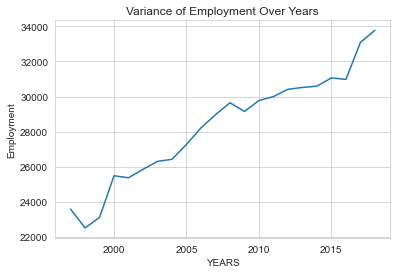

In [208]:
#lineplot
sns.set_style('whitegrid')
sns.lineplot(data=employment_years)
plt.title('Variance of Employment Over Years')
plt.xlabel('YEARS')
plt.ylabel('Employment')
plt.show()


We can see that employment was always evolving throughout the years. <br>
Before 2000, it was at its lowest and decreasing and then started increasing slowly. <br>
There was a little peak between 2005 and 2010,then started to decrease just after which interfere with 2008 economic crisis. Between 2010 and 2015 it was still instable, still some ups and downs then it started increasing from there till it reached more than 30k in 2018. 

### 2- what is the employment wise top Industries 

In [209]:
# Creating a dataframe with emplyment wise industry
emp_industry = output_df.groupby(["LMO_Detailed_Industry"])["Employment"].sum()
emp_industry.head()

LMO_Detailed_Industry
Accommodation services                              9080750.0
Air transportation                                  4325000.0
Ambulatory health care services                    14124250.0
Amusement, gambling and recreation industries       8116000.0
Architectural, engineering and related services     8925250.0
Name: Employment, dtype: float64

<AxesSubplot:ylabel='LMO_Detailed_Industry'>

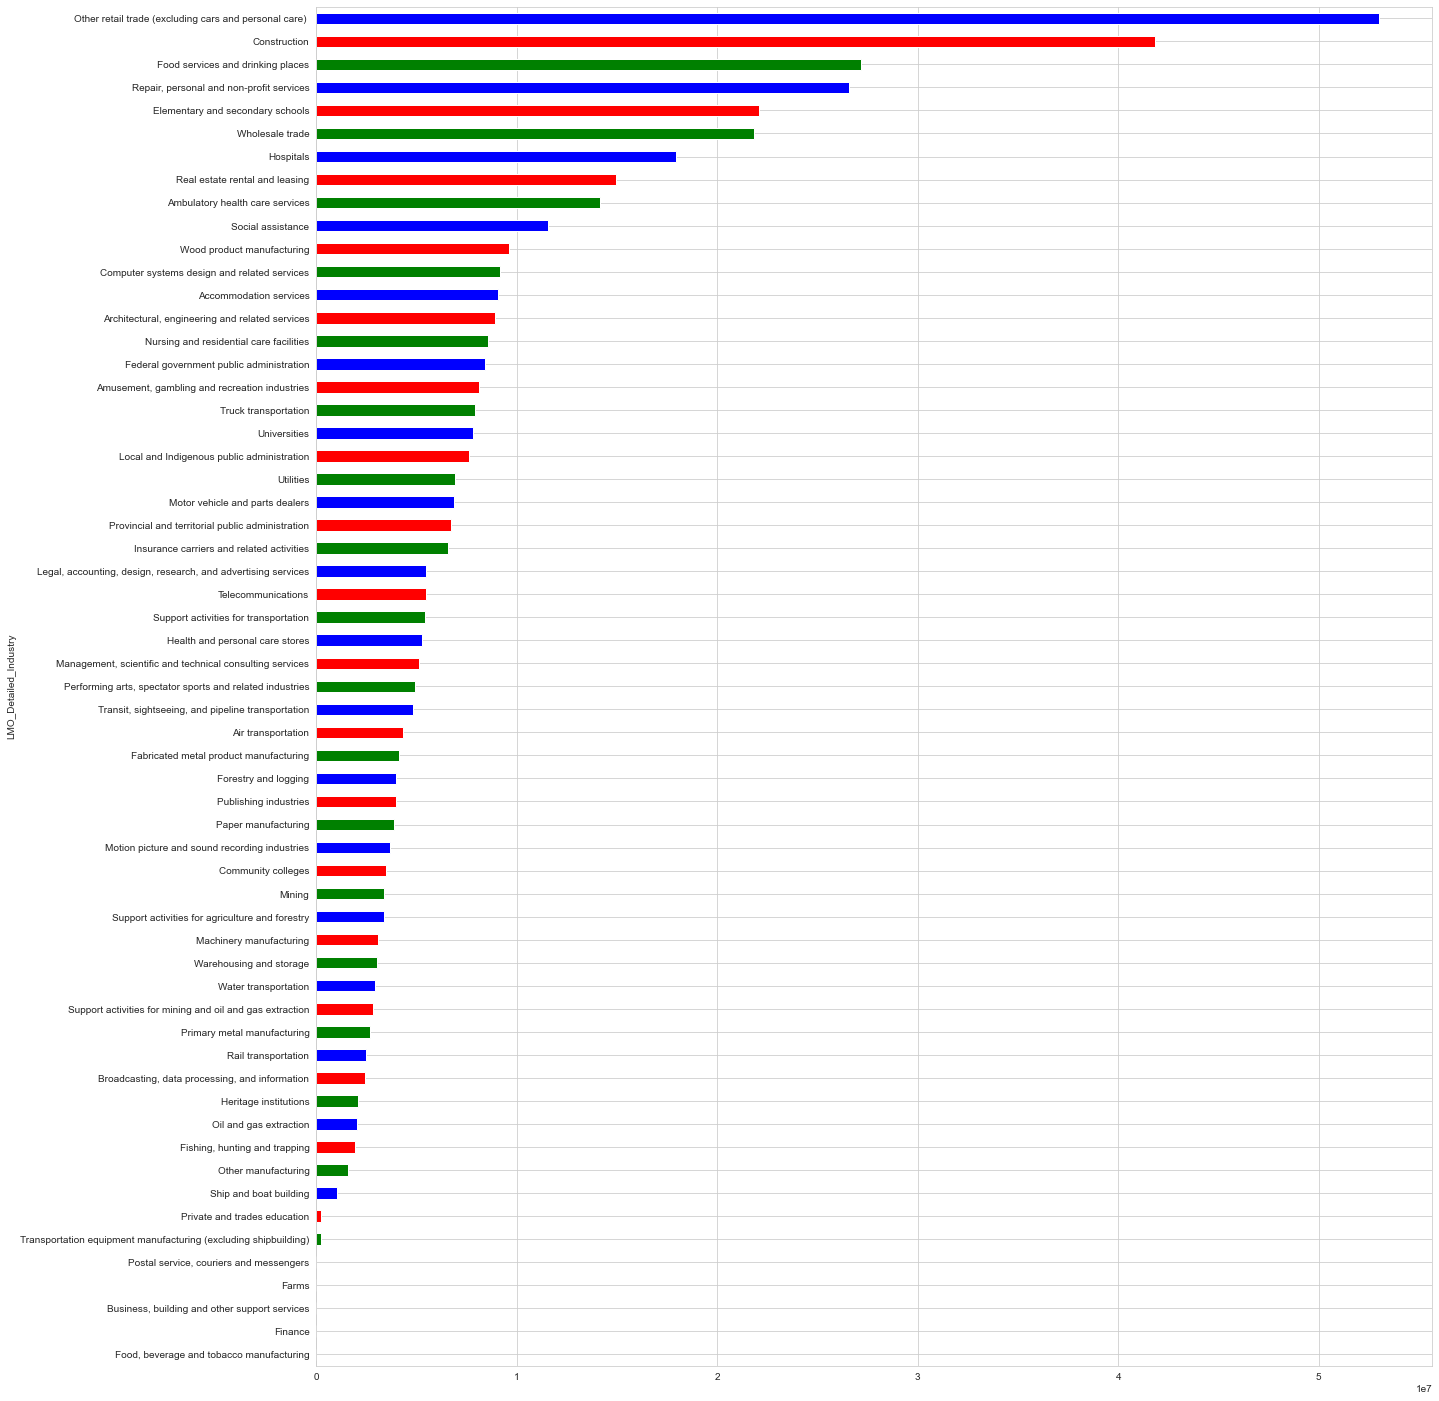

In [210]:
#plot all industries
emp_industry = emp_industry.sort_values(ascending=True)
emp_industry.sort_values(ascending=True).plot(kind="barh", figsize=(20,25),color=["red", "blue", "green"])

#### Top 10 industries

In [211]:
top_10 = emp_industry.sort_values(ascending=False)[:10]
top_10.head()

LMO_Detailed_Industry
Other retail trade (excluding cars and personal care)     53025000.0
Construction                                              41848750.0
Food services and drinking places                         27170250.0
Repair, personal and non-profit services                  26550250.0
Elementary and secondary schools                          22085500.0
Name: Employment, dtype: float64

<AxesSubplot:ylabel='LMO_Detailed_Industry'>

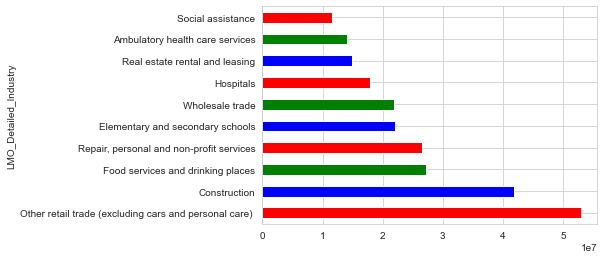

In [212]:
# Plotting employment wise top 10 Industries.

top_10.plot(kind="barh", color=["red", "blue", "green"])

<AxesSubplot:ylabel='Employment'>

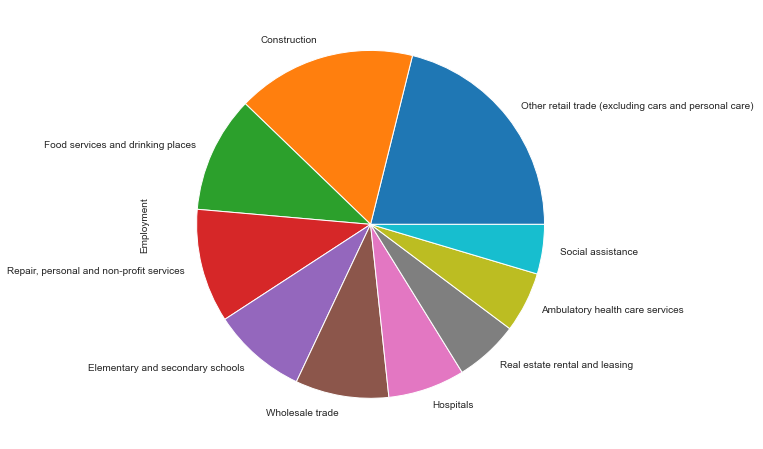

In [218]:
top_10.plot.pie(figsize=(8, 8))


As we can see, Other retail trade (excluding cars and personal care), and Construction are the employment wise top two Industries with 53025000 and 41848750 representatively.                                       

### 3- What are the 5 sectors with lowest numbers of Employees currently and investigate their evolution?


In [219]:
last_10 = emp_industry.sort_values(ascending=True)[:10]

In [220]:
last_10

LMO_Detailed_Industry
Food, beverage and tobacco manufacturing                                 0.0
Finance                                                                  0.0
Business, building and other support services                            0.0
Farms                                                                    0.0
Postal service, couriers and messengers                                  0.0
Transportation equipment manufacturing (excluding shipbuilding)     217000.0
Private and trades education                                        231250.0
Ship and boat building                                             1048750.0
Other manufacturing                                                1582750.0
Fishing, hunting and trapping                                      1935750.0
Name: Employment, dtype: float64

<AxesSubplot:ylabel='LMO_Detailed_Industry'>

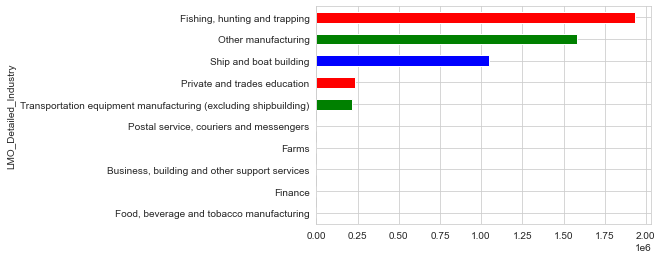

In [221]:
# Plotting employment wise top 10 Industries.
last_10.plot(kind="barh", color=["red", "blue", "green"])

<AxesSubplot:ylabel='Employment'>

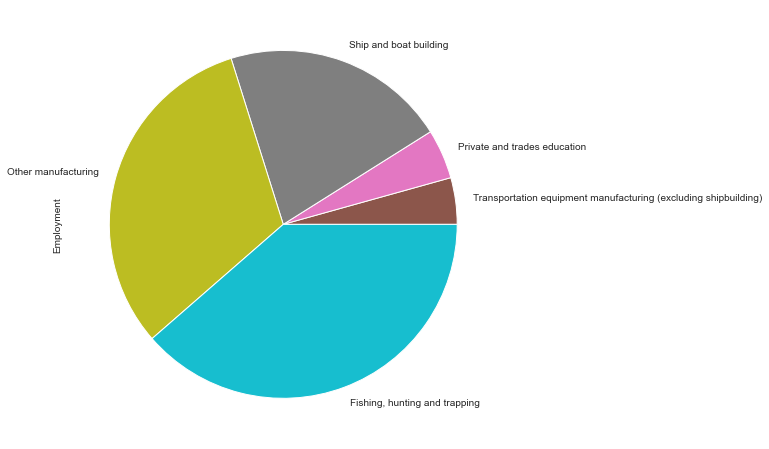

In [222]:
last_10.plot.pie(figsize=(8, 8))

As we can see from the graphs, Transportation equipment manufacturing (excluding shipbuilding) and Private and trades education are the sectors with lowest numbers of Employees currently and investigate their evolution with 217000
and 231250.0 representatively.

### 4- How has the employment in the Construction industries evolved overtime?



plot time series data of the employment in Industry evolved overtime.

In [228]:
#construction over yearsconstruction_
construction_df= output_df[output_df["LMO_Detailed_Industry"] == "Construction"]
construction_year= pd.DataFrame(construction_df.groupby('SYEAR')['Employment'].mean())

In [243]:
construction_df

,SYEAR,SMTH,LMO_Detailed_Industry,CODE,Employment
12,1997,1,Construction,23,118000.0
120,1997,2,Construction,23,120000.0
227,1997,3,Construction,23,116750.0
335,1997,4,Construction,23,125500.0
443,1997,5,Construction,23,123750.0
...,...,...,...,...,...
27740,2018,8,Construction,23,290250.0
27847,2018,9,Construction,23,141250.0
27954,2018,10,Construction,23,14250.0
28061,2018,11,Construction,23,86500.0


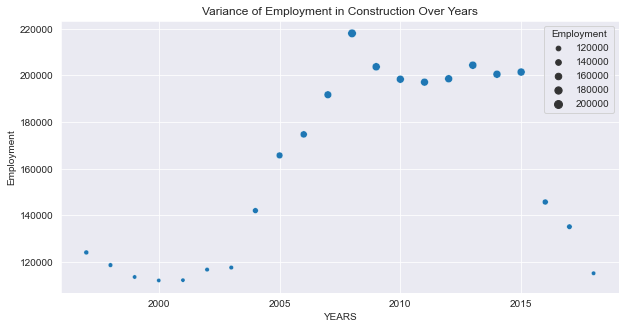

In [229]:
#scatterplot
sns.set_style('darkgrid')
plt.figure(figsize=(10,5))
sns.scatterplot(x=construction_year.index, y='Employment',data=construction_year,size='Employment')
plt.title('Variance of Employment in Construction Over Years')
plt.xlabel('YEARS')
plt.ylabel('Employment')
plt.show()

We can see that employment in constuction kept evolving across the years. <br>
We can see that there was a peak just befor 2010, we can assume that it was between 2007-2009 which means that even throughout the 2008 economic crisis the construction industry kept evolving and even had a bigger evolution, 
so the construction was the industry people turned to after losing their jobs or while not having any during the crisis.

## 5- Comparing employment in Construction with employment across all industries

In [246]:
total_employment_summary= pd.DataFrame(output_df.groupby('SYEAR')['Employment'].mean())
total_employment_summary

,Employment
SYEAR,
1997,23590.333333
1998,22517.761394
1999,23113.515313
2000,25489.247312
2001,25376.008065
2002,25857.190860
2003,26307.459677
2004,26429.099462
2005,27276.209677


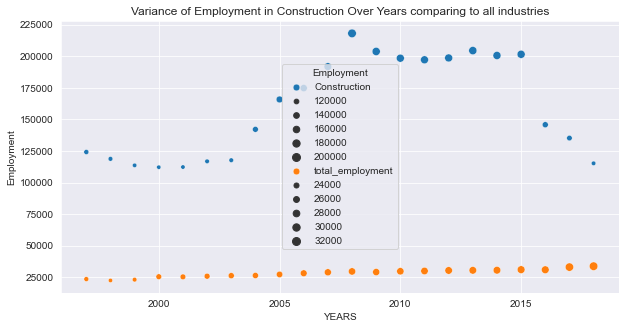

In [261]:
#scatterplot
sns.set_style('darkgrid')
plt.figure(figsize=(10,5))
sns.scatterplot(x=construction_year.index, y='Employment',data=construction_year,size='Employment',label="Construction")
sns.scatterplot(x=total_employment_summary.index, y="Employment", data=total_employment_summary, size='Employment', label="total_employment")
plt.title('Variance of Employment in Construction Over Years comparing to all industries')
plt.xlabel('YEARS')
plt.ylabel('Employment')
plt.show()

The rate of employment is so low comparing to construction or the rest of the industries. <br>
The focus should turn into the industries with the less contribution in the employment, see what problems are affecting the sectors and try to provide solutions to what is possibly holding them from evolving.

## Thank you